In [38]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2,3,4
0,1,1339.33,3790618,1277.50,1341.1400,1271.00
1,1,1318.09,2978300,1362.06,1371.7037,1317.17
2,1,1393.18,2204037,1396.14,1415.7000,1379.00
3,1,1388.45,2478278,1433.00,1438.1400,1382.40
4,1,1421.59,2867053,1426.11,1436.9700,1411.39


In [39]:
#define input
X = df.drop(columns=4)
X.head()

,00,0,1,2,3
0,1,1339.33,3790618,1277.50,1341.1400
1,1,1318.09,2978300,1362.06,1371.7037
2,1,1393.18,2204037,1396.14,1415.7000
3,1,1388.45,2478278,1433.00,1438.1400
4,1,1421.59,2867053,1426.11,1436.9700


In [40]:
#define output
y = df.iloc[:, 5]
y.head()

0    1271.00
1    1317.17
2    1379.00
3    1382.40
4    1411.39
Name: 4, dtype: float64

In [41]:
#normalizing the dataset
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1]) #x=x/max;
X.head()

,00,0,1,2,3
0,1,0.877277,0.339859,0.837666,0.875357
1,1,0.863365,0.267028,0.893113,0.895306
2,1,0.912549,0.197609,0.915460,0.924022
3,1,0.909451,0.222197,0.939629,0.938669
4,1,0.931158,0.257054,0.935111,0.937905


In [42]:
#Initialize theta value
theta = np.array([0]*len(X.columns))
theta
#Output: array([0, 0, 0])

array([0, 0, 0, 0, 0])

In [43]:
#defining the value of m
m = len(df) #m is length of data
m

1492

In [44]:
#defining hypothesis function
#linear notation: theta*x+theta1*x1+...........
def hypothesis(theta, X):
    return theta*X

In [45]:
#defining cost function
def cost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*1492)  #writing the cost function 

In [46]:
#defining gradient descent function
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [47]:
#calling the function
J, j, theta = gradientDescent(X, y, theta, 0.5, 10000)
#In above, alpha value can be anything 0.03 too and iritation can be 1000 or upto 10000

In [48]:
#y_cap is predicted value
y_cap = hypothesis(theta, X)
y_cap = np.sum(y_cap, axis=1)

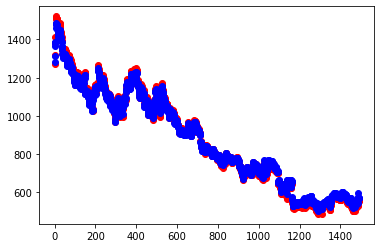

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 1492)),y= y, color='red')         
plt.scatter(x=list(range(0, 1492)), y=y_cap, color='blue')
plt.show()

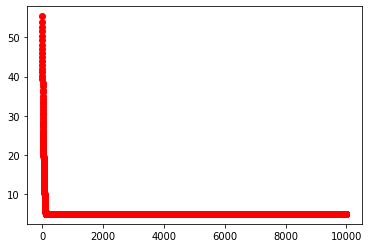

In [50]:
plt.figure()
plt.scatter(x=list(range(0, 10000)),color="red", y=J)
plt.show()